<a href="https://colab.research.google.com/github/Rupesh1919/ML/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task1
# created a directed acyclic graph with average connectivity =2 (5*0.4=2)
# In the probability tables 0 represents the negative case and 1 represents positive case
# import required module

{(0, 4): -5, (1, 4): -8, (2, 3): -9}
finding descendants of nodes
For node 0 It's descendants are [4]
For node 1 It's descendants are [4]
For node 2 It's descendants are [3]
For node 3 It's descendants are []


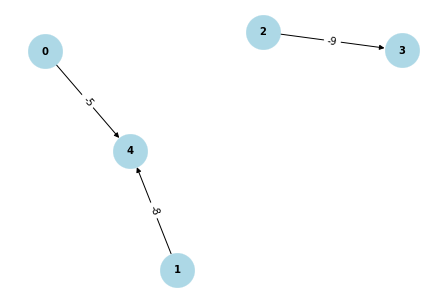

In [ ]:
import networkx as nx
import random
# create object
#G = nx.barabasi_albert_graph (5,2)
N=5
G= nx.gnp_random_graph (5, 0.4, seed=10,directed=True) 
DAG = nx.DiGraph([(u,v,{'weight':random.randint(-10,10)}) for (u,v) in G.edges() if u<v])
# for (u, v) in G.edges():
#   G.edges[u,v]['weight'] = random.random()
  # print(u,v, " Conditional probability = %1.2f " % G.edges[u,v]['weight'])
# note that these weights are only there for demonstration purposes. In your code
# you will need to replace the weights by probability tables for each node.
# illustrate graph
pos = nx.nx_pydot.graphviz_layout(DAG)
nx.draw(DAG,node_size=1200, node_color='lightblue', linewidths=0.25, \
    font_size=10, font_weight='bold',pos=pos, with_labels = True)
labels = {e: round(DAG.edges[e]['weight'],2) for e in DAG.edges}
print(labels)
nx.draw_networkx_edge_labels(DAG, pos, edge_labels=labels)
#finding descendants of a node
print("finding descendants of nodes")
desc=[ [] for _ in range(N)]
for link in DAG.edges():
    desc[link[0]].append(link[1])
for node in range(N-1):
  print("For node", node, "It's descendants are", desc[node])

#Task2 a)display all probability tables represented by dataframe using dynamic approach

In [ ]:

k=[]
for i in range(5):
  count=DAG.in_degree(i)
  if count==0:
    a=["{}".format(i),"P("+"{}".format(i)+")"]
    k.append(a)
  elif count==1:
    pre=0
    for j in range(len(desc)):
       print(desc[j])
       if i in desc[j]:
          pre=j
    a=["{}".format(pre),"{}".format(i),"P("+"{}".format(i)+"/"+"{}".format(pre)+")"]
    k.append(a)
  else:
    count3=[]
    for j in range(len(desc)):
       print(desc[j])
       if i in desc[j]:
          count3.append(j)
    a=["{}".format(count3[0]),"{}".format(count3[1]),"{}".format(i),"P("+"{}".format(i)+"/"+"{}".format(count3[0])+","+"{}".format(count3[1])+")"]
    k.append(a)
print(k)
d = {}
l=[]
import pandas as pd
import random
rnd_num=0
for i in range(5):
  d['node_' + "{}".format(i)] =pd.DataFrame(columns=k[i])
  print( d['node_' + "{}".format(i)])

d['node_' + "{}".format(3)].columns[2]
#Display all probability tables
for i in range(5):
  count=DAG.in_degree(i)
  for j in range(2**(count+1)):
    if j%2==0:
      if count==2:
        str='{0:03b}'.format(j)
      elif count==1:
        str='{0:02b}'.format(j)
      elif count==0:
        str='{0:01b}'.format(j)
      s=[]
      for k in str:
        s.append(k)
      if count==2:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],"{}".format(i):s[2],d['node_' + "{}".format(i)].columns[3]:rnd_num},ignore_index = True)
      elif count==1:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:rnd_num},ignore_index = True)
      elif count==0:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],"P("+"{}".format(i)+")":rnd_num},ignore_index = True)
    else:
      if count==2:
        str='{0:03b}'.format(j)
      elif count==1:
        str='{0:02b}'.format(j)
      elif count==0:
        str='{0:01b}'.format(j)
      s=[]
      for k in str:
        s.append(k)
      if count==2:
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:s[2],d['node_' + "{}".format(i)].columns[3]:1-rnd_num},ignore_index = True)
      elif count==1:
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:1-rnd_num},ignore_index = True)
      elif count==0:
       d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],"P("+"{}".format(i)+")":1-rnd_num},ignore_index = True)
      print("\n")
  print(d['node_' + "{}".format(i)])

[4]
[4]
[3]
[]
[]
[4]
[4]
[3]
[]
[]
[['0', 'P(0)'], ['1', 'P(1)'], ['2', 'P(2)'], ['2', '3', 'P(3/2)'], ['0', '1', '4', 'P(4/0,1)']]
Empty DataFrame
Columns: [0, P(0)]
Index: []
Empty DataFrame
Columns: [1, P(1)]
Index: []
Empty DataFrame
Columns: [2, P(2)]
Index: []
Empty DataFrame
Columns: [2, 3, P(3/2)]
Index: []
Empty DataFrame
Columns: [0, 1, 4, P(4/0,1)]
Index: []


   0      P(0)
0  0  0.442433
1  1  0.557567


   1      P(1)
0  0  0.872334
1  1  0.127666


   2      P(2)
0  0  0.439935
1  1  0.560065




   2  3    P(3/2)
0  0  0  0.781967
1  0  1  0.218033
2  1  0  0.978513
3  1  1  0.021487








   0  1  4  P(4/0,1)
0  0  0  0  0.665504
1  0  0  1  0.334496
2  0  1  0  0.465733
3  0  1  1  0.534267
4  1  0  0  0.160793
5  1  0  1  0.839207
6  1  1  0  0.157292
7  1  1  1  0.842708


# Display of node1(Task 1)

In [ ]:

d['node_1']

,1,P(1)
0,0,0.872334
1,1,0.127666


#Task2
# c) Execute your Python code and show that your code produces the same result as in part b) above. You may want to set a constant seed value during graph
# creation in order to perform code debugging while your graph is frozen in structure and content.

In [ ]:

def Task2(G):
  join_prob=1
  for i in range(5):
    len_prob=len(d['node_' + "{}".format(i)].columns)
    count=d['node_' + "{}".format(i)].shape[0]
    join_prob*=d['node_' + "{}".format(i)].iloc[count-1][d['node_' + "{}".format(i)].columns[len_prob-1]]
  print(join_prob)





In [ ]:
Task2(DAG)

0.0007218721571152091


Task 3
Using the same graph that you used in Task 2, do the same as in parts b) and c) of
Task 2, except that you replace P(+0, +1, +2, +3, +4) by P(+4 | +0, +1, +2, +3). This
is now a classification of node 4’s status as opposed to an inference task. Note that
this task will have one sub task a) that works out the conditional probability by hand
and another sub task b) that display the value from your Python code.

In [ ]:
import string

class Del:
  def __init__(self, keep=string.digits):
    self.comp = dict((ord(c),c) for c in keep)
  def __getitem__(self, k):
    return self.comp.get(k)

In [ ]:
#Task3
def Task3(G):
  print("Enter the conditional probability")
  l=[]
  s=input()
  DD = Del()
  var=s.translate(DD)
  for i in var:
     l.append(i)
  prob_table=l[0]
  cond_prob=[]
  print(prob_table)
  for k in range(len(desc)):
    print(desc[k])
  #conditional probability is the one when it is only descendent from any node that is only involved.
    if int(prob_table) in desc[k]:
       cond_prob.append(k)
  print("Total Probabilty after even "+ prob_table)
  print(cond_prob); 
  len_prob=len(d['node_' + prob_table].columns)
  count=len(d['node_' +prob_table])
  print(count)
  print(d['node_' + prob_table].iloc[count-1][d['node_' + prob_table].columns[len_prob-1]])

In [ ]:

Task3(DAG)

Enter the conditional probability
P(4/0,1,2,3)
4
[4]
[4]
[3]
[]
[]
Total Probabilty after even 4
[0, 1]
8
0.8427079577500111


#task 4 We started the connectivity 0 to 3
# When average connectivity is 0 gnp_random_graph (5, 0, seed=10,directed=True) =>5*0=0

{}
finding descendants of nodes
For node 0 It's descendants are []
For node 1 It's descendants are []
For node 2 It's descendants are []
For node 3 It's descendants are []


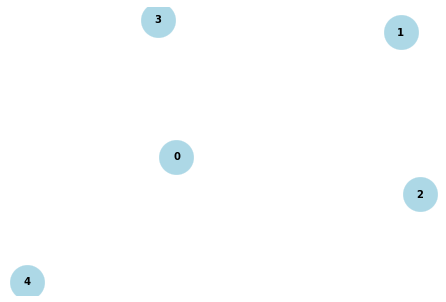

In [ ]:

import networkx as nx
import random
# create object
#G = nx.barabasi_albert_graph (5,2)
N=5
G= nx.gnp_random_graph (5, 0, seed=10,directed=True) 
for (u, v) in G.edges():
  G.edges[u,v]['weight'] = random.random()
  print(u,v, " Conditional probability = %1.2f " % G.edges[u,v]['weight'])
# note that these weights are only there for demonstration purposes. In your code
# you will need to replace the weights by probability tables for each node.
# illustrate graph
pos = nx.nx_pydot.graphviz_layout(G)
nx.draw(G,node_size=1200, node_color='lightblue', linewidths=0.25, \
    font_size=10, font_weight='bold',pos=pos, with_labels = True)
labels = {e: round(G.edges[e]['weight'],2) for e in G.edges}
print(labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
#finding descendants of a node
print("finding descendants of nodes")
desc=[ [] for _ in range(N)]
for link in G.edges():
    desc[link[0]].append(link[1])
for node in range(N-1):
  print("For node", node, "It's descendants are", desc[node])

In [ ]:
k=[]
for i in range(5):
  count=G.in_degree(i)
  if count==0:
    a=["{}".format(i),"P("+"{}".format(i)+")"]
    k.append(a)
  elif count==1:
    pre=0
    for j in range(len(desc)):
       print(desc[j])
       if i in desc[j]:
          pre=j
    a=["{}".format(pre),"{}".format(i),"P("+"{}".format(i)+"/"+"{}".format(pre)+")"]
    k.append(a)
  else:
    count3=[]
    for j in range(len(desc)):
       print(desc[j])
       if i in desc[j]:
          count3.append(j)
    a=["{}".format(count3[0]),"{}".format(count3[1]),"{}".format(i),"P("+"{}".format(i)+"/"+"{}".format(count3[0])+","+"{}".format(count3[1])+")"]
    k.append(a)
print(k)
d = {}
l=[]
import pandas as pd
import random
rnd_num=0
for i in range(5):
  d['node_' + "{}".format(i)] =pd.DataFrame(columns=k[i])
  print( d['node_' + "{}".format(i)])

#Display all probability tables
for i in range(5):
  count=G.in_degree(i)
  for j in range(2**(count+1)):
    if j%2==0:
      if count==2:
        str='{0:03b}'.format(j)
      elif count==1:
        str='{0:02b}'.format(j)
      elif count==0:
        str='{0:01b}'.format(j)
      s=[]
      for k in str:
        s.append(k)
      if count==2:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],"{}".format(i):s[2],d['node_' + "{}".format(i)].columns[3]:rnd_num},ignore_index = True)
      elif count==1:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:rnd_num},ignore_index = True)
      elif count==0:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],"P("+"{}".format(i)+")":rnd_num},ignore_index = True)
    else:
      if count==2:
        str='{0:03b}'.format(j)
      elif count==1:
        str='{0:02b}'.format(j)
      elif count==0:
        str='{0:01b}'.format(j)
      s=[]
      for k in str:
        s.append(k)
      if count==2:
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:s[2],d['node_' + "{}".format(i)].columns[3]:1-rnd_num},ignore_index = True)
      elif count==1:
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:1-rnd_num},ignore_index = True)
      elif count==0:
       d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],"P("+"{}".format(i)+")":1-rnd_num},ignore_index = True)
      print("\n")
  print(d['node_' + "{}".format(i)])

[['0', 'P(0)'], ['1', 'P(1)'], ['2', 'P(2)'], ['3', 'P(3)'], ['4', 'P(4)']]
Empty DataFrame
Columns: [0, P(0)]
Index: []
Empty DataFrame
Columns: [1, P(1)]
Index: []
Empty DataFrame
Columns: [2, P(2)]
Index: []
Empty DataFrame
Columns: [3, P(3)]
Index: []
Empty DataFrame
Columns: [4, P(4)]
Index: []


   0      P(0)
0  0  0.693366
1  1  0.306634


   1      P(1)
0  0  0.852871
1  1  0.147129


   2      P(2)
0  0  0.907794
1  1  0.092206


   3      P(3)
0  0  0.915683
1  1  0.084317


   4      P(4)
0  0  0.507566
1  1  0.492434


In [ ]:
Task2(G)

0.00017271857991974263


In [ ]:
Task3(G)

Enter the conditional probability
P(4/3,2,1,0)
4
[]
[]
[]
[]
[]
Total Probabilty after even 4
[]
2
0.4924340548063214


#Task4  when connectivity is 0.5 as we change in gnp_random_graph (5, 0.1, seed=10,directed=True) so 5*0.1=0.5

3 1  Conditional probability = 0.23 
{(3, 1): 0.23}
finding descendants of nodes
For node 0 It's descendants are []
For node 1 It's descendants are []
For node 2 It's descendants are []
For node 3 It's descendants are [1]


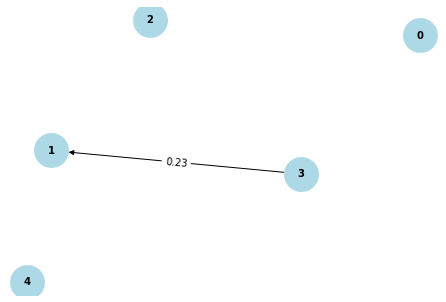

In [ ]:

# import required module
import networkx as nx
import random
# create object
#G = nx.barabasi_albert_graph (5,2)
N=5
G= nx.gnp_random_graph (5, 0.1, seed=10,directed=True) 
for (u, v) in G.edges():
  G.edges[u,v]['weight'] = random.random()
  print(u,v, " Conditional probability = %1.2f " % G.edges[u,v]['weight'])
# note that these weights are only there for demonstration purposes. In your code
# you will need to replace the weights by probability tables for each node.
# illustrate graph
pos = nx.nx_pydot.graphviz_layout(G)
nx.draw(G,node_size=1200, node_color='lightblue', linewidths=0.25, \
    font_size=10, font_weight='bold',pos=pos, with_labels = True)
labels = {e: round(G.edges[e]['weight'],2) for e in G.edges}
print(labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
#finding descendants of a node
print("finding descendants of nodes")
desc=[ [] for _ in range(N)]
for link in G.edges():
    desc[link[0]].append(link[1])
for node in range(N-1):
  print("For node", node, "It's descendants are", desc[node])

In [ ]:
k=[]
for i in range(5):
  count=G.in_degree(i)
  if count==0:
    a=["{}".format(i),"P("+"{}".format(i)+")"]
    k.append(a)
  elif count==1:
    pre=0
    for j in range(len(desc)):
       print(desc[j])
       if i in desc[j]:
          pre=j
    a=["{}".format(pre),"{}".format(i),"P("+"{}".format(i)+"/"+"{}".format(pre)+")"]
    k.append(a)
  else:
    count3=[]
    for j in range(len(desc)):
       print(desc[j])
       if i in desc[j]:
          count3.append(j)
    a=["{}".format(count3[0]),"{}".format(count3[1]),"{}".format(i),"P("+"{}".format(i)+"/"+"{}".format(count3[0])+","+"{}".format(count3[1])+")"]
    k.append(a)
print(k)
d = {}
l=[]
import pandas as pd
import random
rnd_num=0
for i in range(5):
  d['node_' + "{}".format(i)] =pd.DataFrame(columns=k[i])
  print( d['node_' + "{}".format(i)])

#Display all probability tables
for i in range(5):
  count=G.in_degree(i)
  for j in range(2**(count+1)):
    if j%2==0:
      if count==2:
        str='{0:03b}'.format(j)
      elif count==1:
        str='{0:02b}'.format(j)
      elif count==0:
        str='{0:01b}'.format(j)
      s=[]
      for k in str:
        s.append(k)
      if count==2:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],"{}".format(i):s[2],d['node_' + "{}".format(i)].columns[3]:rnd_num},ignore_index = True)
      elif count==1:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:rnd_num},ignore_index = True)
      elif count==0:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],"P("+"{}".format(i)+")":rnd_num},ignore_index = True)
    else:
      if count==2:
        str='{0:03b}'.format(j)
      elif count==1:
        str='{0:02b}'.format(j)
      elif count==0:
        str='{0:01b}'.format(j)
      s=[]
      for k in str:
        s.append(k)
      if count==2:
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:s[2],d['node_' + "{}".format(i)].columns[3]:1-rnd_num},ignore_index = True)
      elif count==1:
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:1-rnd_num},ignore_index = True)
      elif count==0:
       d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],"P("+"{}".format(i)+")":1-rnd_num},ignore_index = True)
      print("\n")
  print(d['node_' + "{}".format(i)])

[]
[]
[]
[1]
[]
[['0', 'P(0)'], ['3', '1', 'P(1/3)'], ['2', 'P(2)'], ['3', 'P(3)'], ['4', 'P(4)']]
Empty DataFrame
Columns: [0, P(0)]
Index: []
Empty DataFrame
Columns: [3, 1, P(1/3)]
Index: []
Empty DataFrame
Columns: [2, P(2)]
Index: []
Empty DataFrame
Columns: [3, P(3)]
Index: []
Empty DataFrame
Columns: [4, P(4)]
Index: []


   0    P(0)
0  0  0.4584
1  1  0.5416




   3  1    P(1/3)
0  0  0  0.770027
1  0  1  0.229973
2  1  0  0.100178
3  1  1  0.899822


   2      P(2)
0  0  0.260609
1  1  0.739391


   3      P(3)
0  0  0.844086
1  1  0.155914


   4      P(4)
0  0  0.779097
1  1  0.220903


In [ ]:
Task2(G)

0.012410674792729726


In [ ]:
Task3(G)

Enter the conditional probability
P(4/0,1,2,3)
4
[]
[]
[]
[1]
[]
Total Probabilty after even 4
[]
2
0.2209025947081782


#Task4  when connectivity is 1 as we change in gnp_random_graph (5, 0.2, seed=10,directed=True) so 5*0.2=1

1 4  Conditional probability = 0.89 
3 1  Conditional probability = 0.48 
{(1, 4): 0.89, (3, 1): 0.48}
finding descendants of nodes
For node 0 It's descendants are []
For node 1 It's descendants are [4]
For node 2 It's descendants are []
For node 3 It's descendants are [1]


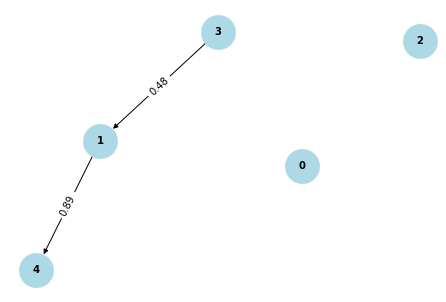

In [ ]:

# import required module
import networkx as nx
import random
# create object
#G = nx.barabasi_albert_graph (5,2)
N=5
G= nx.gnp_random_graph (5, 0.2, seed=10,directed=True) 
for (u, v) in G.edges():
  G.edges[u,v]['weight'] = random.random()
  print(u,v, " Conditional probability = %1.2f " % G.edges[u,v]['weight'])
# note that these weights are only there for demonstration purposes. In your code
# you will need to replace the weights by probability tables for each node.
# illustrate graph
pos = nx.nx_pydot.graphviz_layout(G)
nx.draw(G,node_size=1200, node_color='lightblue', linewidths=0.25, \
    font_size=10, font_weight='bold',pos=pos, with_labels = True)
labels = {e: round(G.edges[e]['weight'],2) for e in G.edges}
print(labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
#finding descendants of a node
print("finding descendants of nodes")
desc=[ [] for _ in range(N)]
for link in G.edges():
    desc[link[0]].append(link[1])
for node in range(N-1):
  print("For node", node, "It's descendants are", desc[node])

In [ ]:
k=[]
for i in range(5):
  count=G.in_degree(i)
  if count==0:
    a=["{}".format(i),"P("+"{}".format(i)+")"]
    k.append(a)
  elif count==1:
    pre=0
    for j in range(len(desc)):
       print(desc[j])
       if i in desc[j]:
          pre=j
    a=["{}".format(pre),"{}".format(i),"P("+"{}".format(i)+"/"+"{}".format(pre)+")"]
    k.append(a)
  else:
    count3=[]
    for j in range(len(desc)):
       print(desc[j])
       if i in desc[j]:
          count3.append(j)
    a=["{}".format(count3[0]),"{}".format(count3[1]),"{}".format(i),"P("+"{}".format(i)+"/"+"{}".format(count3[0])+","+"{}".format(count3[1])+")"]
    k.append(a)
print(k)
d = {}
l=[]
import pandas as pd
import random
rnd_num=0
for i in range(5):
  d['node_' + "{}".format(i)] =pd.DataFrame(columns=k[i])
  print( d['node_' + "{}".format(i)])

#Display all probability tables
for i in range(5):
  count=G.in_degree(i)
  for j in range(2**(count+1)):
    if j%2==0:
      if count==2:
        str='{0:03b}'.format(j)
      elif count==1:
        str='{0:02b}'.format(j)
      elif count==0:
        str='{0:01b}'.format(j)
      s=[]
      for k in str:
        s.append(k)
      if count==2:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],"{}".format(i):s[2],d['node_' + "{}".format(i)].columns[3]:rnd_num},ignore_index = True)
      elif count==1:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:rnd_num},ignore_index = True)
      elif count==0:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],"P("+"{}".format(i)+")":rnd_num},ignore_index = True)
    else:
      if count==2:
        str='{0:03b}'.format(j)
      elif count==1:
        str='{0:02b}'.format(j)
      elif count==0:
        str='{0:01b}'.format(j)
      s=[]
      for k in str:
        s.append(k)
      if count==2:
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:s[2],d['node_' + "{}".format(i)].columns[3]:1-rnd_num},ignore_index = True)
      elif count==1:
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:1-rnd_num},ignore_index = True)
      elif count==0:
       d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],"P("+"{}".format(i)+")":1-rnd_num},ignore_index = True)
      print("\n")
  print(d['node_' + "{}".format(i)])

[]
[4]
[]
[1]
[]
[]
[4]
[]
[1]
[]
[['0', 'P(0)'], ['3', '1', 'P(1/3)'], ['2', 'P(2)'], ['3', 'P(3)'], ['1', '4', 'P(4/1)']]
Empty DataFrame
Columns: [0, P(0)]
Index: []
Empty DataFrame
Columns: [3, 1, P(1/3)]
Index: []
Empty DataFrame
Columns: [2, P(2)]
Index: []
Empty DataFrame
Columns: [3, P(3)]
Index: []
Empty DataFrame
Columns: [1, 4, P(4/1)]
Index: []


   0      P(0)
0  0  0.901567
1  1  0.098433




   3  1    P(1/3)
0  0  0  0.827880
1  0  1  0.172120
2  1  0  0.831881
3  1  1  0.168119


   2      P(2)
0  0  0.025166
1  1  0.974834


   3      P(3)
0  0  0.328198
1  1  0.671802




   1  4    P(4/1)
0  0  0  0.732696
1  0  1  0.267304
2  1  0  0.135035
3  1  1  0.864965


In [ ]:
Task2(G)

0.00937405977651771


In [ ]:
Task3(G)

Enter the conditional probability
P(4/0,1,2,3)
4
[]
[4]
[]
[1]
[]
Total Probabilty after even 4
[1]
4
0.8649653716676349


0 4  Conditional probability = 0.68 
1 4  Conditional probability = 0.97 
2 3  Conditional probability = 0.21 
3 1  Conditional probability = 0.93 
4 1  Conditional probability = 0.78 
{(0, 4): 0.68, (1, 4): 0.97, (2, 3): 0.21, (3, 1): 0.93, (4, 1): 0.78}
finding descendants of nodes
For node 0 It's descendants are [4]
For node 1 It's descendants are [4]
For node 2 It's descendants are [3]
For node 3 It's descendants are [1]


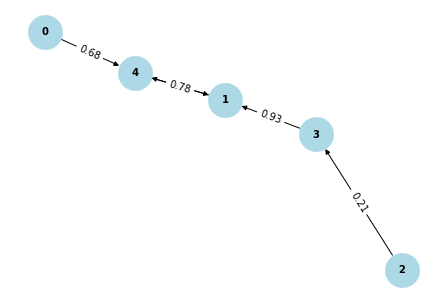

In [ ]:
#Task4  when connectivity is 1.5 as we change in gnp_random_graph (5, 0.3, seed=10,directed=True) so 5*0.3=1.5
# import required module
import networkx as nx
import random
# create object
#G = nx.barabasi_albert_graph (5,2)
N=5
G= nx.gnp_random_graph (5, 0.3, seed=10,directed=True) 
for (u, v) in G.edges():
  G.edges[u,v]['weight'] = random.random()
  print(u,v, " Conditional probability = %1.2f " % G.edges[u,v]['weight'])
# note that these weights are only there for demonstration purposes. In your code
# you will need to replace the weights by probability tables for each node.
# illustrate graph
pos = nx.nx_pydot.graphviz_layout(G)
nx.draw(G,node_size=1200, node_color='lightblue', linewidths=0.25, \
    font_size=10, font_weight='bold',pos=pos, with_labels = True)
labels = {e: round(G.edges[e]['weight'],2) for e in G.edges}
print(labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
#finding descendants of a node
print("finding descendants of nodes")
desc=[ [] for _ in range(N)]
for link in G.edges():
    desc[link[0]].append(link[1])
for node in range(N-1):
  print("For node", node, "It's descendants are", desc[node])

In [ ]:
k=[]
for i in range(5):
  count=G.in_degree(i)
  if count==0:
    a=["{}".format(i),"P("+"{}".format(i)+")"]
    k.append(a)
  elif count==1:
    pre=0
    for j in range(len(desc)):
       print(desc[j])
       if i in desc[j]:
          pre=j
    a=["{}".format(pre),"{}".format(i),"P("+"{}".format(i)+"/"+"{}".format(pre)+")"]
    k.append(a)
  else:
    count3=[]
    for j in range(len(desc)):
       print(desc[j])
       if i in desc[j]:
          count3.append(j)
    a=["{}".format(count3[0]),"{}".format(count3[1]),"{}".format(i),"P("+"{}".format(i)+"/"+"{}".format(count3[0])+","+"{}".format(count3[1])+")"]
    k.append(a)
print(k)
d = {}
l=[]
import pandas as pd
import random
rnd_num=0
for i in range(5):
  d['node_' + "{}".format(i)] =pd.DataFrame(columns=k[i])
  print( d['node_' + "{}".format(i)])

#Display all probability tables
for i in range(5):
  count=G.in_degree(i)
  for j in range(2**(count+1)):
    if j%2==0:
      if count==2:
        str='{0:03b}'.format(j)
      elif count==1:
        str='{0:02b}'.format(j)
      elif count==0:
        str='{0:01b}'.format(j)
      s=[]
      for k in str:
        s.append(k)
      if count==2:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],"{}".format(i):s[2],d['node_' + "{}".format(i)].columns[3]:rnd_num},ignore_index = True)
      elif count==1:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:rnd_num},ignore_index = True)
      elif count==0:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],"P("+"{}".format(i)+")":rnd_num},ignore_index = True)
    else:
      if count==2:
        str='{0:03b}'.format(j)
      elif count==1:
        str='{0:02b}'.format(j)
      elif count==0:
        str='{0:01b}'.format(j)
      s=[]
      for k in str:
        s.append(k)
      if count==2:
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:s[2],d['node_' + "{}".format(i)].columns[3]:1-rnd_num},ignore_index = True)
      elif count==1:
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:1-rnd_num},ignore_index = True)
      elif count==0:
       d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],"P("+"{}".format(i)+")":1-rnd_num},ignore_index = True)
      print("\n")
  print(d['node_' + "{}".format(i)])

[4]
[4]
[3]
[1]
[1]
[4]
[4]
[3]
[1]
[1]
[4]
[4]
[3]
[1]
[1]
[['0', 'P(0)'], ['3', '4', '1', 'P(1/3,4)'], ['2', 'P(2)'], ['2', '3', 'P(3/2)'], ['0', '1', '4', 'P(4/0,1)']]
Empty DataFrame
Columns: [0, P(0)]
Index: []
Empty DataFrame
Columns: [3, 4, 1, P(1/3,4)]
Index: []
Empty DataFrame
Columns: [2, P(2)]
Index: []
Empty DataFrame
Columns: [2, 3, P(3/2)]
Index: []
Empty DataFrame
Columns: [0, 1, 4, P(4/0,1)]
Index: []


   0     P(0)
0  0  0.82068
1  1  0.17932








   3  4  1  P(1/3,4)
0  0  0  0  0.507458
1  0  0  1  0.492542
2  0  1  0  0.312679
3  0  1  1  0.687321
4  1  0  0  0.900683
5  1  0  1  0.099317
6  1  1  0  0.850701
7  1  1  1  0.149299


   2      P(2)
0  0  0.142865
1  1  0.857135




   2  3    P(3/2)
0  0  0  0.462956
1  0  1  0.537044
2  1  0  0.527891
3  1  1  0.472109








   0  1  4  P(4/0,1)
0  0  0  0  0.136666
1  0  0  1  0.863334
2  0  1  0  0.550375
3  0  1  1  0.449625
4  1  0  0  0.522068
5  1  0  1  0.477932
6  1  1  0  0.249858
7  1  1  1  0.750142


In [ ]:
Task2(G)

0.008126785896648066


In [ ]:
Task3(G)

Enter the conditional probability
P(4/0,1,2,3)
4
[4]
[4]
[3]
[1]
[1]
Total Probabilty after even 4
[0, 1]
8
0.7501418159883454


# when connectivity is 2.5 =>5*0.5=2.5

{(0, 2): -2, (0, 4): -3, (2, 3): 10, (1, 4): 10}
finding descendants of nodes
For node 0 It's descendants are [2, 4]
For node 1 It's descendants are [4]
For node 2 It's descendants are [3]
For node 3 It's descendants are []


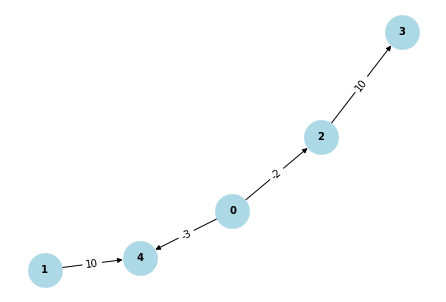

In [ ]:
# import required module()
import networkx as nx
import random
# create object
#G = nx.barabasi_albert_graph (5,2)
N=5
G= nx.gnp_random_graph (5, 0.5, seed=10,directed=True) 
DAG = nx.DiGraph([(u,v,{'weight':random.randint(-10,10)}) for (u,v) in G.edges() if u<v])
# for (u, v) in G.edges():
#   G.edges[u,v]['weight'] = random.random()
  # print(u,v, " Conditional probability = %1.2f " % G.edges[u,v]['weight'])
# note that these weights are only there for demonstration purposes. In your code
# you will need to replace the weights by probability tables for each node.
# illustrate graph
pos = nx.nx_pydot.graphviz_layout(DAG)
nx.draw(DAG,node_size=1200, node_color='lightblue', linewidths=0.25, \
    font_size=10, font_weight='bold',pos=pos, with_labels = True)
labels = {e: round(DAG.edges[e]['weight'],2) for e in DAG.edges}
print(labels)
nx.draw_networkx_edge_labels(DAG, pos, edge_labels=labels)
#finding descendants of a node
print("finding descendants of nodes")
desc=[ [] for _ in range(N)]
for link in DAG.edges():
    desc[link[0]].append(link[1])
for node in range(N-1):
  print("For node", node, "It's descendants are", desc[node])

In [ ]:
k=[]
for i in range(5):
  count=DAG.in_degree(i)
  if count==0:
    a=["{}".format(i),"P("+"{}".format(i)+")"]
    k.append(a)
  elif count==1:
    pre=0
    for j in range(len(desc)):
       print(desc[j])
       if i in desc[j]:
          pre=j
    a=["{}".format(pre),"{}".format(i),"P("+"{}".format(i)+"/"+"{}".format(pre)+")"]
    k.append(a)
  else:
    count3=[]
    for j in range(len(desc)):
       print(desc[j])
       if i in desc[j]:
          count3.append(j)
    a=["{}".format(count3[0]),"{}".format(count3[1]),"{}".format(i),"P("+"{}".format(i)+"/"+"{}".format(count3[0])+","+"{}".format(count3[1])+")"]
    k.append(a)
print(k)
d = {}
l=[]
import pandas as pd
import random
rnd_num=0
for i in range(5):
  d['node_' + "{}".format(i)] =pd.DataFrame(columns=k[i])
  print( d['node_' + "{}".format(i)])

d['node_' + "{}".format(3)].columns[2]
#Display all probability tables
for i in range(5):
  count=DAG.in_degree(i)
  for j in range(2**(count+1)):
    if j%2==0:
      if count==2:
        str='{0:03b}'.format(j)
      elif count==1:
        str='{0:02b}'.format(j)
      elif count==0:
        str='{0:01b}'.format(j)
      s=[]
      for k in str:
        s.append(k)
      if count==2:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],"{}".format(i):s[2],d['node_' + "{}".format(i)].columns[3]:rnd_num},ignore_index = True)
      elif count==1:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:rnd_num},ignore_index = True)
      elif count==0:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],"P("+"{}".format(i)+")":rnd_num},ignore_index = True)
    else:
      if count==2:
        str='{0:03b}'.format(j)
      elif count==1:
        str='{0:02b}'.format(j)
      elif count==0:
        str='{0:01b}'.format(j)
      s=[]
      for k in str:
        s.append(k)
      if count==2:
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:s[2],d['node_' + "{}".format(i)].columns[3]:1-rnd_num},ignore_index = True)
      elif count==1:
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:1-rnd_num},ignore_index = True)
      elif count==0:
       d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],"P("+"{}".format(i)+")":1-rnd_num},ignore_index = True)
      print("\n")
  print(d['node_' + "{}".format(i)])

[2, 4]
[4]
[3]
[]
[]
[2, 4]
[4]
[3]
[]
[]
[2, 4]
[4]
[3]
[]
[]
[['0', 'P(0)'], ['1', 'P(1)'], ['0', '2', 'P(2/0)'], ['2', '3', 'P(3/2)'], ['0', '1', '4', 'P(4/0,1)']]
Empty DataFrame
Columns: [0, P(0)]
Index: []
Empty DataFrame
Columns: [1, P(1)]
Index: []
Empty DataFrame
Columns: [0, 2, P(2/0)]
Index: []
Empty DataFrame
Columns: [2, 3, P(3/2)]
Index: []
Empty DataFrame
Columns: [0, 1, 4, P(4/0,1)]
Index: []


   0      P(0)
0  0  0.895084
1  1  0.104916


   1      P(1)
0  0  0.887847
1  1  0.112153




   0  2    P(2/0)
0  0  0  0.784581
1  0  1  0.215419
2  1  0  0.645337
3  1  1  0.354663




   2  3    P(3/2)
0  0  0  0.127169
1  0  1  0.872831
2  1  0  0.005082
3  1  1  0.994918








   0  1  4  P(4/0,1)
0  0  0  0  0.740786
1  0  0  1  0.259214
2  0  1  0  0.208436
3  0  1  1  0.791564
4  1  0  0  0.704518
5  1  0  1  0.295482
6  1  1  0  0.999566
7  1  1  1  0.000434


In [ ]:
Task2(G)

1.8033177961468701e-06


In [ ]:
Task3(G)

Enter the conditional probability
P(4/0,1,2,3)
4
[2, 4]
[4]
[3]
[]
[]
Total Probabilty after even 4
[0, 1]
8
0.00043432536657239673


# when connectivity is 3 =>5*0.6=3

{(0, 2): -5, (0, 4): 5, (2, 3): 7, (1, 4): 6}
finding descendants of nodes
For node 0 It's descendants are [2, 4]
For node 1 It's descendants are [4]
For node 2 It's descendants are [3]
For node 3 It's descendants are []


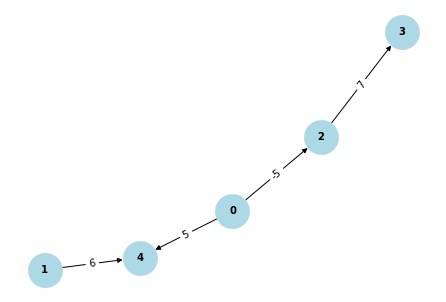

In [ ]:
# import required module
import networkx as nx
import random
# create object
#G = nx.barabasi_albert_graph (5,2)
N=5
G= nx.gnp_random_graph (5, 0.5, seed=10,directed=True) 
DAG = nx.DiGraph([(u,v,{'weight':random.randint(-10,10)}) for (u,v) in G.edges() if u<v])
# for (u, v) in G.edges():
#   G.edges[u,v]['weight'] = random.random()
  # print(u,v, " Conditional probability = %1.2f " % G.edges[u,v]['weight'])
# note that these weights are only there for demonstration purposes. In your code
# you will need to replace the weights by probability tables for each node.
# illustrate graph
pos = nx.nx_pydot.graphviz_layout(DAG)
nx.draw(DAG,node_size=1200, node_color='lightblue', linewidths=0.25, \
    font_size=10, font_weight='bold',pos=pos, with_labels = True)
labels = {e: round(DAG.edges[e]['weight'],2) for e in DAG.edges}
print(labels)
nx.draw_networkx_edge_labels(DAG, pos, edge_labels=labels)
#finding descendants of a node
print("finding descendants of nodes")
desc=[ [] for _ in range(N)]
for link in DAG.edges():
    desc[link[0]].append(link[1])
for node in range(N-1):
  print("For node", node, "It's descendants are", desc[node])

In [ ]:
k=[]
for i in range(5):
  count=DAG.in_degree(i)
  if count==0:
    a=["{}".format(i),"P("+"{}".format(i)+")"]
    k.append(a)
  elif count==1:
    pre=0
    for j in range(len(desc)):
       print(desc[j])
       if i in desc[j]:
          pre=j
    a=["{}".format(pre),"{}".format(i),"P("+"{}".format(i)+"/"+"{}".format(pre)+")"]
    k.append(a)
  else:
    count3=[]
    for j in range(len(desc)):
       print(desc[j])
       if i in desc[j]:
          count3.append(j)
    a=["{}".format(count3[0]),"{}".format(count3[1]),"{}".format(i),"P("+"{}".format(i)+"/"+"{}".format(count3[0])+","+"{}".format(count3[1])+")"]
    k.append(a)
print(k)
d = {}
l=[]
import pandas as pd
import random
rnd_num=0
for i in range(5):
  d['node_' + "{}".format(i)] =pd.DataFrame(columns=k[i])
  print( d['node_' + "{}".format(i)])

d['node_' + "{}".format(3)].columns[2]
#Display all probability tables
for i in range(5):
  count=DAG.in_degree(i)
  for j in range(2**(count+1)):
    if j%2==0:
      if count==2:
        str='{0:03b}'.format(j)
      elif count==1:
        str='{0:02b}'.format(j)
      elif count==0:
        str='{0:01b}'.format(j)
      s=[]
      for k in str:
        s.append(k)
      if count==2:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],"{}".format(i):s[2],d['node_' + "{}".format(i)].columns[3]:rnd_num},ignore_index = True)
      elif count==1:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:rnd_num},ignore_index = True)
      elif count==0:
        rnd_num=random.random()
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],"P("+"{}".format(i)+")":rnd_num},ignore_index = True)
    else:
      if count==2:
        str='{0:03b}'.format(j)
      elif count==1:
        str='{0:02b}'.format(j)
      elif count==0:
        str='{0:01b}'.format(j)
      s=[]
      for k in str:
        s.append(k)
      if count==2:
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:s[2],d['node_' + "{}".format(i)].columns[3]:1-rnd_num},ignore_index = True)
      elif count==1:
        d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],d['node_' + "{}".format(i)].columns[1]:s[1],d['node_' + "{}".format(i)].columns[2]:1-rnd_num},ignore_index = True)
      elif count==0:
       d['node_' + "{}".format(i)]=d['node_' + "{}".format(i)].append({d['node_' + "{}".format(i)].columns[0]:s[0],"P("+"{}".format(i)+")":1-rnd_num},ignore_index = True)
      print("\n")
  print(d['node_' + "{}".format(i)])

[2, 4]
[4]
[3]
[]
[]
[2, 4]
[4]
[3]
[]
[]
[2, 4]
[4]
[3]
[]
[]
[['0', 'P(0)'], ['1', 'P(1)'], ['0', '2', 'P(2/0)'], ['2', '3', 'P(3/2)'], ['0', '1', '4', 'P(4/0,1)']]
Empty DataFrame
Columns: [0, P(0)]
Index: []
Empty DataFrame
Columns: [1, P(1)]
Index: []
Empty DataFrame
Columns: [0, 2, P(2/0)]
Index: []
Empty DataFrame
Columns: [2, 3, P(3/2)]
Index: []
Empty DataFrame
Columns: [0, 1, 4, P(4/0,1)]
Index: []


   0      P(0)
0  0  0.241947
1  1  0.758053


   1      P(1)
0  0  0.333684
1  1  0.666316




   0  2    P(2/0)
0  0  0  0.177873
1  0  1  0.822127
2  1  0  0.433664
3  1  1  0.566336




   2  3    P(3/2)
0  0  0  0.989342
1  0  1  0.010658
2  1  0  0.183347
3  1  1  0.816653








   0  1  4  P(4/0,1)
0  0  0  0  0.840845
1  0  0  1  0.159155
2  0  1  0  0.404800
3  0  1  1  0.595200
4  1  0  0  0.527647
5  1  0  1  0.472353
6  1  1  0  0.276552
7  1  1  1  0.723448


In [ ]:
Task2(DAG)

0.16900471663126573


In [ ]:
Task3(DAG)

Enter the conditional probability
P(4/0,1,2,3)
4
[2, 4]
[4]
[3]
[]
[]
Total Probabilty after even 4
[0, 1]
8
0.7234476407792794
